# Predict Automobile Accident Risk in Virginia
*Saarthak Gupta, Agi Luong, Joshua Seiden*

Abstract:

## Step 1: Load the data set

In [1]:
# Before you run this cell for the first time, you must do the following:
# 1. Download the data set from: https://drive.google.com/file/d/1zV1LdMx-3rqzsZNpRg5X3gtSMcV_VUZy/view?usp=sharing
# 2. Store the data set (Crash_Data.csv) in the Root Folder of your Google Drive
# 3. Once the data is uploaded, run this cell. It will prompt you to allow access to your Google Drive
# 4. Once you click through all the menus, the data should be loaded into the 'data' dataframe after this cell is done
# 5. In the future, this cell will always be able to load in the data without needing to upload a new file

from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd

Mounted at /content/gdrive


In [2]:
data = pd.read_csv('gdrive/My Drive/Crash_Data.csv')

In [ ]:
pd.set_option('display.max_columns', None)
data.head(10)

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_DT,CRASH_MILITARY_TM,CRASH_SEVERITY,K_PEOPLE,A_PEOPLE,B_PEOPLE,C_PEOPLE,PERSONS_INJURED,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,VEH_COUNT,COLLISION_TYPE,WEATHER_CONDITION,LIGHT_CONDITION,ROADWAY_SURFACE_COND,RELATION_TO_ROADWAY,ROADWAY_ALIGNMENT,ROADWAY_SURFACE_TYPE,ROADWAY_DEFECT,ROADWAY_DESCRIPTION,INTERSECTION_TYPE,TRAFFIC_CONTROL_TYPE,TRFC_CTRL_STATUS_TYPE,WORK_ZONE_RELATED,WORK_ZONE_LOCATION,WORK_ZONE_TYPE,SCHOOL_ZONE,FIRST_HARMFUL_EVENT,FIRST_HARMFUL_EVENT_LOC,ALCOHOL_NOTALCOHOL,ANIMAL,BELTED_UNBELTED,BIKE_NONBIKE,DISTRACTED_NOTDISTRACTED,DROWSY_NOTDROWSY,DRUG_NODRUG,GR_NOGR,HITRUN_NOT_HITRUN,LGTRUCK_NONLGTRUCK,MOTOR_NONMOTOR,PED_NONPED,SPEED_NOTSPEED,SPEED_DIFF_MAX,RD_TYPE,INTERSECTION_ANALYSIS,SENIOR_NOTSENIOR,YOUNG_NOTYOUNG,MAINLINE_YN,NIGHT,VDOT_DISTRICT,JURIS_CODE,PHYSICAL_JURIS,FUN,FAC,AREA_TYPE,SYSTEM,VSP,OWNERSHIP,PLAN_DISTRICT,MPO_NAME,RTE_NM,RNS_MP,NODE,OFFSET
0,-78.870556,38.645544,1,152915206,2015,2015/10/16 03:59:59+00,1700,A,0,2,1,0,3,0,0,2,3. Head On,1. No Adverse Condition (Clear/Cloudy),2. Daylight,1. Dry,"13. Driveway, Alley-Access - Related",3. Grade - Straight,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"1. Two-Way, Not Divided",1. Not at Intersection,6. Traffic Lanes Marked,2. Yes - Working and Obscured,2. No,NaN,NaN,3. No,20. Motor Vehicle In Transport,1. On Roadway,No,No,Belted,No,Yes,No,No,No,No,No,No,No,Yes,3.0,NOT_RD,Not Intersection,No,No,Yes,No,8. Staunton,82,082. Rockingham County,"4-Minor Arterial (H,3)",3-Two-Way Undivided,Rural,VDOT Primary,2,1. State Hwy Agency,Central Shenandoah,NaN,R-VA SR00259SB,9.63,586049.0,834.0
1,-77.134973,38.943531,2,153060033,2015,2015/10/10 03:59:59+00,2350,O,0,0,0,0,0,0,0,1,9. Fixed Object - Off Road,1. No Adverse Condition (Clear/Cloudy),5. Darkness - Road Not Lighted,1. Dry,1. Main-Line Roadway,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"1. Two-Way, Not Divided",1. Not at Intersection,1. No Traffic Control,6. No Traffic Control Device Present,2. No,NaN,NaN,3. No,28. Ran Off Road,4. Roadside,Yes,No,Belted,No,Yes,Yes,No,Yes,No,No,No,No,Yes,10.0,RD_RIGHT,Not Intersection,No,Yes,Yes,Yes,9. Northern Virginia,29,029. Fairfax County,"7-Local (J,6)",3-Two-Way Undivided,Urban,NonVDOT secondary,7,4. Federal Roads,Northern Virginia,NOVA,R-VA OT90072NB,0.41,NaN,NaN
2,-79.499399,36.660702,3,153035144,2015,2015/10/29 03:59:59+00,1124,B,0,0,1,0,1,0,0,1,9. Fixed Object - Off Road,1. No Adverse Condition (Clear/Cloudy),2. Daylight,1. Dry,8. Non-Intersection,3. Grade - Straight,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"1. Two-Way, Not Divided",1. Not at Intersection,6. Traffic Lanes Marked,1. Yes - Working,2. No,NaN,NaN,3. No,28. Ran Off Road,1. On Roadway,No,No,Belted,No,No,No,No,No,No,No,No,No,No,NaN,NOT_RD,VDOT Intersection,Yes,No,Yes,No,3. Lynchburg,71,071. Pittsylvania County,"5-Major Collector (I,4)",3-Two-Way Undivided,Rural,VDOT Secondary,6,1. State Hwy Agency,West Piedmont,NaN,R-VA071SC00750SB,5.90,518624.0,137.0
3,-77.336244,38.545770,4,150975078,2015,2015/04/06 03:59:59+00,900,O,0,0,0,0,0,0,0,2,1. Rear End,1. No Adverse Condition (Clear/Cloudy),2. Daylight,1. Dry,9. Within Intersection,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"2. Two-Way, Divided, Unprotected Median",4. Four Approaches,3. Traffic Signal,1. Yes - Working,2. No,NaN,NaN,3. No,20. Motor Vehicle In Transport,1. On Roadway,No,No,Belted,No,No,No,No,No,No,No,No,No,No,NaN,NOT_RD,Not Intersection,No,No,Yes,No,9. Northern Virginia,76,076. Prince William County,"5-Major Collector (I,4)",3-Two-Way Undivided,Urban,VDOT Secondary,7,1. State Hwy Agency,Northern Virginia,NOVA,R-VA076SC00619EB,25.74,NaN,NaN
4,-79.337225,36.581073,5,152335159,2015,2015/08/21 03:59:59+00,751,O,0,0,0,0,0,0,0,2,2. Angle,1. No Adverse Condition (Clear/Cloudy),2. Daylight,1. Dry,1. Main-Line Roadway,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"2. Two-Way, Divided, Unprotected Median",1. Not at Intersection

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048311 entries, 0 to 1048310
Data columns (total 69 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   X                         1048297 non-null  float64
 1   Y                         1048297 non-null  float64
 2   OBJECTID                  1048311 non-null  int64  
 3   DOCUMENT_NBR              1048311 non-null  int64  
 4   CRASH_YEAR                1048311 non-null  int64  
 5   CRASH_DT                  1048311 non-null  object 
 6   CRASH_MILITARY_TM         1048311 non-null  int64  
 7   CRASH_SEVERITY            1048311 non-null  object 
 8   K_PEOPLE                  1048311 non-null  int64  
 9   A_PEOPLE                  1048311 non-null  int64  
 10  B_PEOPLE                  1048311 non-null  int64  
 11  C_PEOPLE                  1048311 non-null  int64  
 12  PERSONS_INJURED           1048311 non-null  int64  
 13  PEDESTRIANS_KILLED        1

In [ ]:
# The number of total unique Virginia roads represented in this data

# Details of how route names work: https://www.arcgis.com/apps/Cascade/index.html?appid=dfd5ea4d540f485f9ab2a8fe7697c256

len(data['RTE_NM'].unique())

58656

## Step 2: EDA

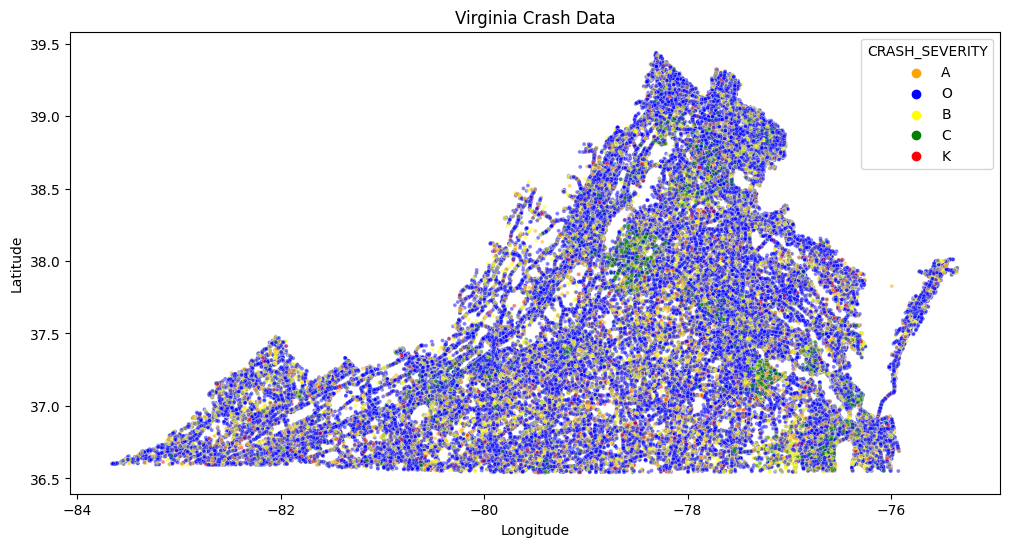

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

severity_colors = {'K': 'red', 'A': 'orange', 'B': 'yellow', 'C': 'green', 'O': 'blue'}

plt.figure(figsize=(12, 6))
sns.scatterplot(x='X', y='Y', hue='CRASH_SEVERITY', data=data, alpha=0.5, palette=severity_colors, s=8)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Virginia Crash Data')
plt.show()

# K - Fatality
# A - Suspected Serious Injury
# B - Suspected Minor Injury
# C - Possible Injury
# O - Property Damage Only (No Apparent Injury)

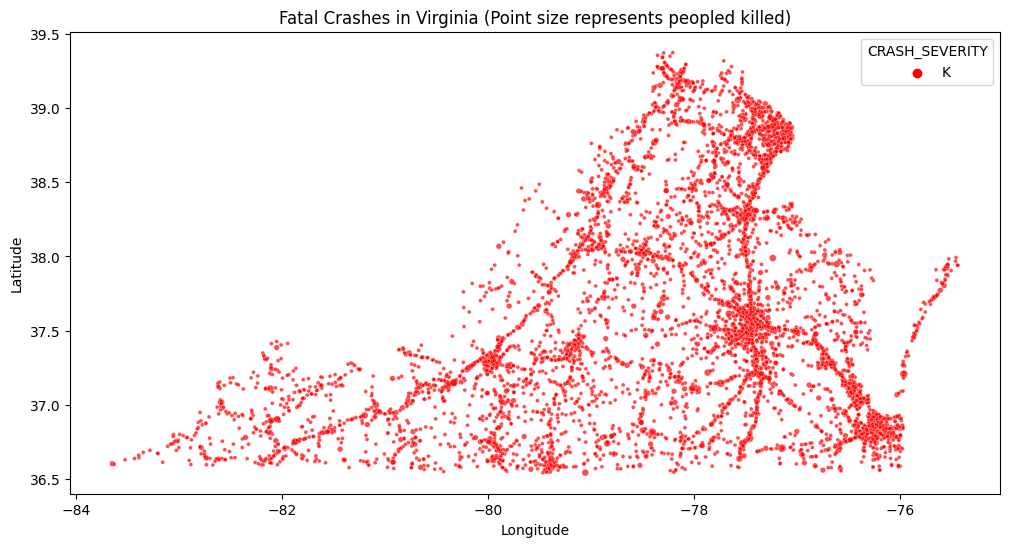

In [ ]:
fatal = data[data['CRASH_SEVERITY'] == 'K']
plt.figure(figsize=(12, 6))
sns.scatterplot(x='X', y='Y', hue='CRASH_SEVERITY', data=fatal, alpha=0.7, palette=severity_colors, s=fatal['K_PEOPLE']*8)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fatal Crashes in Virginia (Point size represents peopled killed)')
plt.show()

In [ ]:
# Find out number of unique values for each feature
for k, v in dict(data.nunique()).items():
  print('{}: {}'.format(k, v))

X: 906489
Y: 906536
OBJECTID: 1048311
DOCUMENT_NBR: 1048311
CRASH_YEAR: 9
CRASH_DT: 3103
CRASH_MILITARY_TM: 1440
CRASH_SEVERITY: 5
K_PEOPLE: 6
A_PEOPLE: 15
B_PEOPLE: 26
C_PEOPLE: 23
PERSONS_INJURED: 31
PEDESTRIANS_KILLED: 4
PEDESTRIANS_INJURED: 9
VEH_COUNT: 19
COLLISION_TYPE: 17
WEATHER_CONDITION: 11
LIGHT_CONDITION: 7
ROADWAY_SURFACE_COND: 11
RELATION_TO_ROADWAY: 15
ROADWAY_ALIGNMENT: 10
ROADWAY_SURFACE_TYPE: 6
ROADWAY_DEFECT: 10
ROADWAY_DESCRIPTION: 5
INTERSECTION_TYPE: 6
TRAFFIC_CONTROL_TYPE: 18
TRFC_CTRL_STATUS_TYPE: 6
WORK_ZONE_RELATED: 2
WORK_ZONE_LOCATION: 4
WORK_ZONE_TYPE: 5
SCHOOL_ZONE: 3
FIRST_HARMFUL_EVENT: 42
FIRST_HARMFUL_EVENT_LOC: 9
ALCOHOL_NOTALCOHOL: 2
ANIMAL: 2
BELTED_UNBELTED: 2
BIKE_NONBIKE: 2
DISTRACTED_NOTDISTRACTED: 2
DROWSY_NOTDROWSY: 2
DRUG_NODRUG: 2
GR_NOGR: 2
HITRUN_NOT_HITRUN: 2
LGTRUCK_NONLGTRUCK: 2
MOTOR_NONMOTOR: 2
PED_NONPED: 2
SPEED_NOTSPEED: 2
SPEED_DIFF_MAX: 101
RD_TYPE: 4
INTERSECTION_ANALYSIS: 3
SENIOR_NOTSENIOR: 2
YOUNG_NOTYOUNG: 2
MAINLINE_YN: 2
N

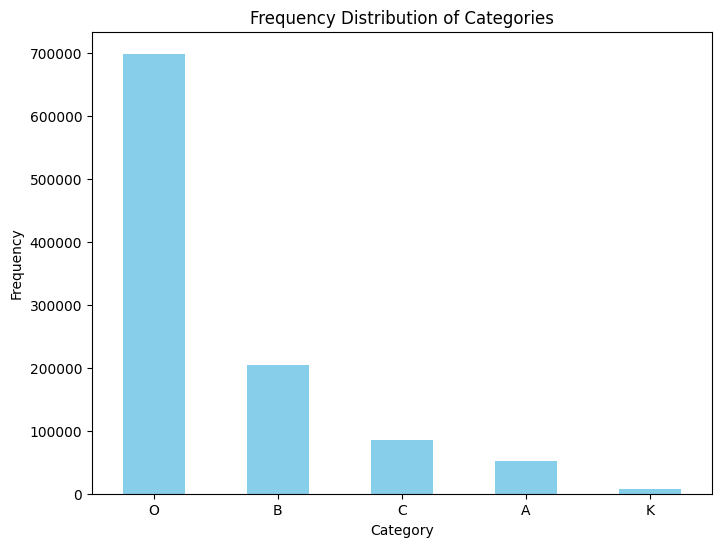

In [ ]:
value_counts = data['CRASH_SEVERITY'].value_counts()

plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

## Step 3: Data Cleaning

### Missing Values

In [ ]:
# fill in the columns where crash is not work zone related
data['WORK_ZONE_LOCATION'].fillna('Not Applicable', inplace=True)
data['WORK_ZONE_TYPE'].fillna('Not Applicable', inplace=True)

# Drop unnecessary columns with missing data
# Changes: added 'K_PEOPLE', 'A_PEOPLE', 'B_PEOPLE', 'C_PEOPLE', 'PERSONS_INJURED'
columns_to_drop = ['SPEED_DIFF_MAX', 'FUN', 'FAC', 'MPO_NAME', 'NODE', 'OFFSET', 'RNS_MP', 'OBJECTID', 'DOCUMENT_NBR', 'PHYSICAL_JURIS', 'RTE_NM', 'VSP', 'JURIS_CODE',
                   'K_PEOPLE', 'A_PEOPLE', 'B_PEOPLE', 'C_PEOPLE', 'PERSONS_INJURED']

data.drop(columns=columns_to_drop, inplace=True)

data.dropna(subset=['X', 'Y'], inplace=True)
data = data.reset_index(drop=True)

### Encode Date String

In [ ]:
# encode date
from datetime import datetime

# 2015/10/16 03:59:59+00	-> number
def date_string_convert(date_string):
  length = len(date_string)
  date_string = date_string[0:length-3]
  date_obj = datetime.strptime(date_string, "%Y/%m/%d %H:%M:%S")
  timestamp = date_obj.timestamp()
  return timestamp

data["CRASH_DT"] = data["CRASH_DT"].apply(date_string_convert)

# Train Test Split
Stratified sampling based on CRASH_SEVERITY

In [ ]:
X = data.drop(columns=['CRASH_SEVERITY'])
y = data['CRASH_SEVERITY'].copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

## Pipeline for Data Cleaning

In [ ]:
# num_features = ["X", "Y", "CRASH_YEAR", "CRASH_DT", "CRASH_MILITARY_TM", "K_PEOPLE", "A_PEOPLE", "B_PEOPLE", "C_PEOPLE", "PERSONS_INJURED", "PEDESTRIANS_KILLED", "VEH_COUNT", "PEDESTRIANS_INJURED"]

num_features = ["X", "Y", "CRASH_YEAR", "CRASH_DT", "CRASH_MILITARY_TM", "PEDESTRIANS_KILLED", "VEH_COUNT", "PEDESTRIANS_INJURED"]
# Changes: removed "K_PEOPLE", "A_PEOPLE", "B_PEOPLE", "C_PEOPLE", PERSONS_INJURED

one_hot_features = ["COLLISION_TYPE",	"WEATHER_CONDITION",	"LIGHT_CONDITION",	"ROADWAY_SURFACE_COND",	"RELATION_TO_ROADWAY",	"ROADWAY_ALIGNMENT",	"ROADWAY_SURFACE_TYPE",
                    "ROADWAY_DEFECT",	"ROADWAY_DESCRIPTION",	"INTERSECTION_TYPE",	"TRAFFIC_CONTROL_TYPE",	"TRFC_CTRL_STATUS_TYPE",	"WORK_ZONE_RELATED",	"WORK_ZONE_LOCATION",
                    "WORK_ZONE_TYPE",	"SCHOOL_ZONE",	"FIRST_HARMFUL_EVENT",	"FIRST_HARMFUL_EVENT_LOC",	"ALCOHOL_NOTALCOHOL",	"ANIMAL",	"BELTED_UNBELTED",	"BIKE_NONBIKE",
                    "DISTRACTED_NOTDISTRACTED",	"DROWSY_NOTDROWSY",	"DRUG_NODRUG",	"GR_NOGR",	"HITRUN_NOT_HITRUN",	"LGTRUCK_NONLGTRUCK",	"MOTOR_NONMOTOR",	"PED_NONPED",	"SPEED_NOTSPEED",
                    "RD_TYPE",	"INTERSECTION_ANALYSIS",	"SENIOR_NOTSENIOR",	"YOUNG_NOTYOUNG",	"MAINLINE_YN",	"NIGHT",	"VDOT_DISTRICT",	"AREA_TYPE",	"SYSTEM",	"OWNERSHIP",	"PLAN_DISTRICT"]

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler


categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, one_hot_features),
        ('num', numerical_pipeline, num_features)
    ])

X_cleaned = preprocessor.fit_transform(X_train)

In [ ]:
X_cleaned.shape

(838637, 284)

# Train and Test Models

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_cleaned, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_cleaned, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy, precision, recall, and F1 score
def print_model_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)


In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


test_cleaned = preprocessor.fit_transform(X_test)
y_pred = classifier.predict(test_cleaned)


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9991670932304673
Recall: 0.9991653152723458
F1 Score: 0.9991500757676389


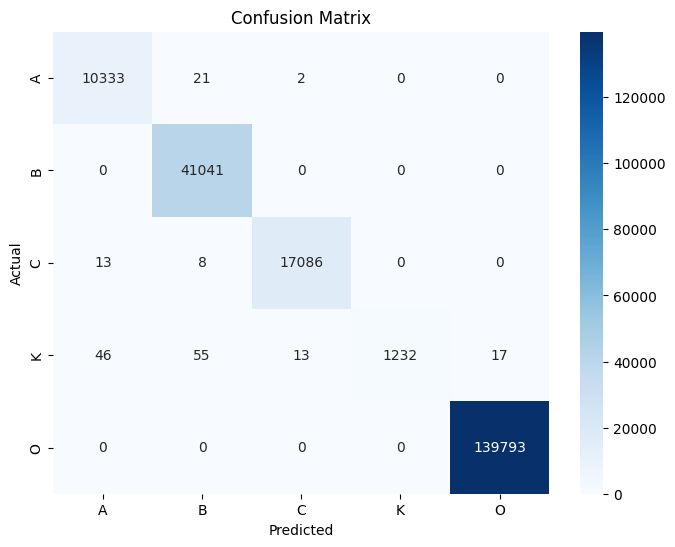

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Now, lets take a look at the relative importance of features learned by the model:

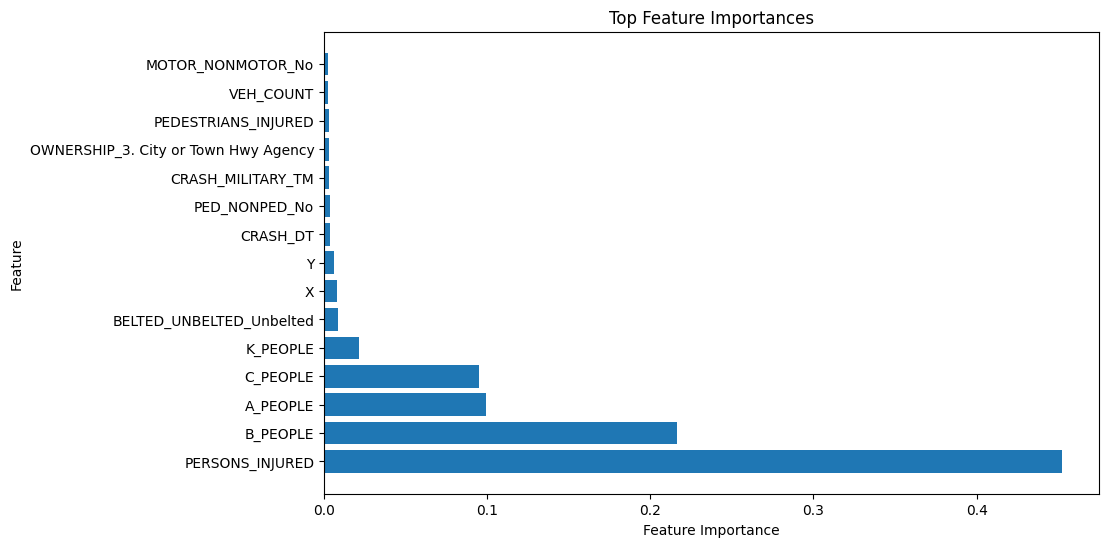

In [ ]:
import matplotlib.pyplot as plt

feature_importances = classifier.feature_importances_
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=one_hot_features)
all_feature_names = list(categorical_feature_names) + num_features
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features
top_n = 15
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances')
plt.show()


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_clf = LogisticRegression(solver='liblinear', random_state=42)
log_reg_clf.fit(X_cleaned, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.5, 1, 2, 5],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

clf = LogisticRegression(solver='liblinear', random_state=42)

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_cleaned, y_train)

In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


test_cleaned = preprocessor.fit_transform(X_test)
y_pred = log_reg_clf.predict(test_cleaned)


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9999856921178508
Recall: 0.9999856911189545
F1 Score: 0.9999856911954393


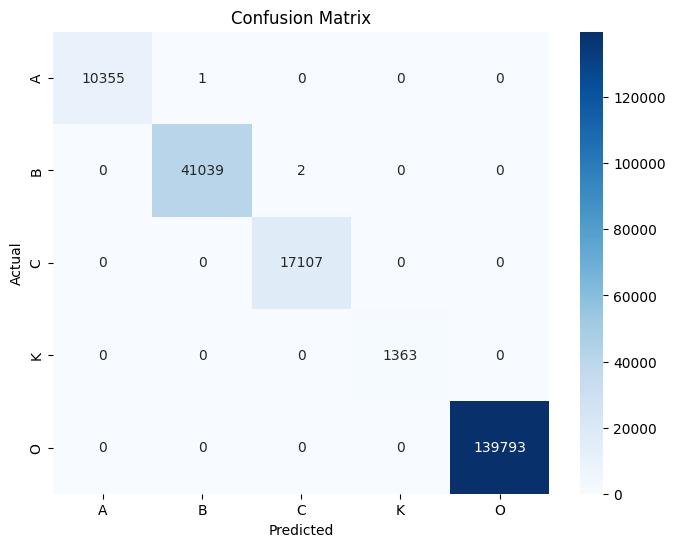

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=log_reg_clf.classes_, yticklabels=log_reg_clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Questions
- Can we predict if a crash will be fatal given various features?
- What features contribute most to the fatality of a crash?

# Time Series Forecasting for Number of Crashes

In [2]:
data = pd.read_csv('gdrive/My Drive/Crash_Data.csv')

value_counts = data['PHYSICAL_JURIS'].value_counts()
print(value_counts)

data['CRASH_DT'] = pd.to_datetime(data['CRASH_DT'], utc=True)
data['date'] = data['CRASH_DT'].dt.date
df_sorted = data.sort_values(by='date')

029. Fairfax County            98318
134. City of Virginia Beach    52180
043. Henrico County            48584
127. City of Richmond          47895
020. Chesterfield County       46019
                               ...  
287. Town of Quantico              4
296. Town of Saxis                 4
193. Town of Cleveland             3
293. Town of St. Charles           3
309. Town of Tangier               1
Name: PHYSICAL_JURIS, Length: 324, dtype: int64


In [15]:
df_sorted

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_DT,CRASH_MILITARY_TM,CRASH_SEVERITY,K_PEOPLE,A_PEOPLE,...,SYSTEM,VSP,OWNERSHIP,PLAN_DISTRICT,MPO_NAME,RTE_NM,RNS_MP,NODE,OFFSET,date
16770,-79.096347,38.160256,16771,150695225,2015,2015-01-01 05:00:00+00:00,330,C,0,0,...,NonVDOT secondary,3,3. City or Town Hwy Agency,Central Shenandoah,SAW,S-VA132PR GRUBERT AVE,0.35,136558.0,1853.0,2015-01-01
67593,-77.208626,38.933244,67594,150335083,2015,2015-01-01 05:00:00+00:00,2122,O,0,0,...,VDOT Primary,7,1. State Hwy Agency,Northern Virginia,NOVA,R-VA SR00267WB RMP018.00A,0.07,719611.0,433.0,2015-01-01
110315,-76.728825,37.997448,110316,150025119,2015,2015-01-01 05:00:00+00:00,545,O,0,0,...,VDOT Primary,1,1. State Hwy Agency,Northern Neck,NaN,R-VA SR00003EB,87.31,566297.0,11.0,2015-01-01
35514,-82.608684,36.939000,35515,150325022,2015,2015-01-01 05:00:00+00:00,1847,O,0,0,...,VDOT Primary,4,1. State Hwy Agency,Lenowisco,NaN,R-VA US00058WBALT001,38.36,662021.0,681.0,2015-01-01
53947,-76.331580,36.788664,53948,150025175,2015,2015-01-01 05:00:00+00:00,2259,A,0,1,...,NonVDOT secondary,5,3. City or Town Hwy Agency,Hampton Roads,HAMP,S-VA131PR FERNDALE RD,0.02,NaN,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994456,-76.363232,37.030105,994457,231935102,2023,2023-06-30 03:59:59+00:00,1211,C,0,0,...,NonVDOT secondary,5,3. City or Town Hwy Agency,Hampton Roads,HAMP,S-VA114NP MICHIGAN DR,0.48,NaN,NaN,2023-06-30
1016186,-75.762711,37.619373,1016187,231845231,2023,2023-06-30 03:59:59+00:00,614,C,0,0,...,VDOT Primary,5,1. State Hwy Agency,Accomack-Northampton,NaN,R-VA US00013SB,111.71,105797.0,143.0,2023-06-30
1002272,-76.127929,36.904062,1002273,231995033,2023,2023-06-30 03:59:59+00:00,1527,O,0,0,...,NonVDOT primary,5,3. City or Town Hwy Agency,Hampton Roads,HAMP,R-VA US00060WB,290.63,541131.0,37.0,2023-06-30
1037655,-79.948101,37.772266,1037656,231835142,2023,2023-06-30 03:59:59+00:00,1722,O,0,0,...,VDOT Interstate,6,1. State Hwy Agency,Roanoke Valley-Alleghany,NaN,R-VA IS00064WB,17.77,NaN,NaN,2023-06-30


What are we doing:
- Regression for whole state
- Regression for large counties

### Let's start by looking at some example time series in the data

In [29]:
import matplotlib.pyplot as plt

def plot_all():
    plt.figure(figsize=(12, 6))
    daily_counts = df_sorted.groupby('date').size()

    daily_counts.plot(kind='line', linestyle='-')
    plt.title('Number of Accidents per Day')
    plt.xlabel('Date')
    plt.ylabel('Number of Accidents')
    plt.show()

def plot_county_year(county, year):
    plt.figure(figsize=(12, 6))

    filtered_df = df_sorted[df_sorted['CRASH_DT'].dt.year == year]
    filter_by_county = filtered_df[filtered_df['PHYSICAL_JURIS'] == county]
    daily_counts = filter_by_county.groupby('date').size()

    daily_counts.plot(kind='line', linestyle='-', color='tab:green')
    plt.title('Number of Accidents per Day in {} {}'.format(county, year))
    plt.xlabel('Date')
    plt.ylabel('Number of Accidents')
    plt.show()

def plot_year(year):
    plt.figure(figsize=(12, 6))

    filtered_df = df_sorted[df_sorted['CRASH_DT'].dt.year == year]
    daily_counts = filtered_df.groupby('date').size()

    daily_counts.plot(kind='line', linestyle='-', color='tab:orange')
    plt.title('Number of Accidents per Day in {}'.format(year))
    plt.xlabel('Date')
    plt.ylabel('Number of Accidents')
    plt.show()

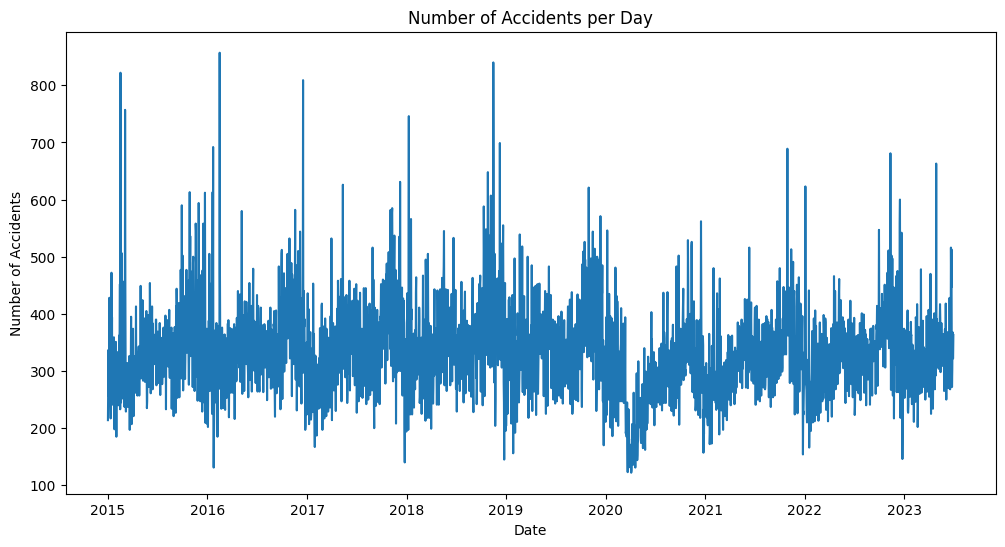

In [30]:
plot_all()

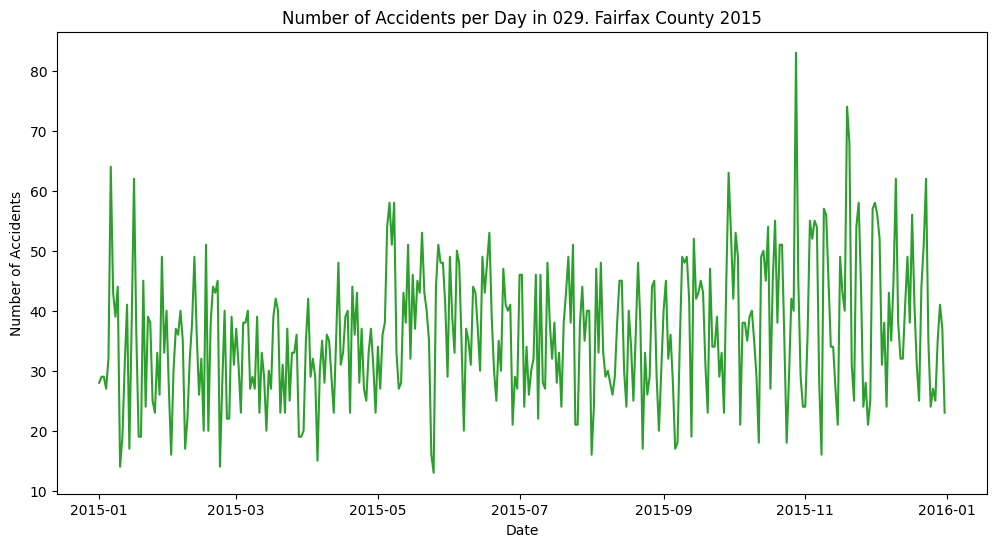

In [31]:
plot_county_year("029. Fairfax County", 2015)

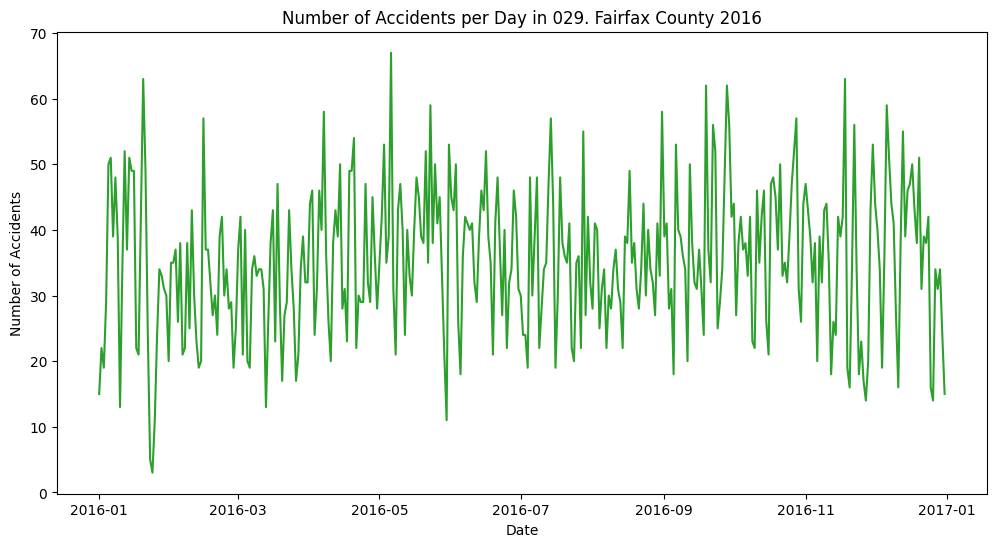

In [32]:
plot_county_year("029. Fairfax County", 2016)

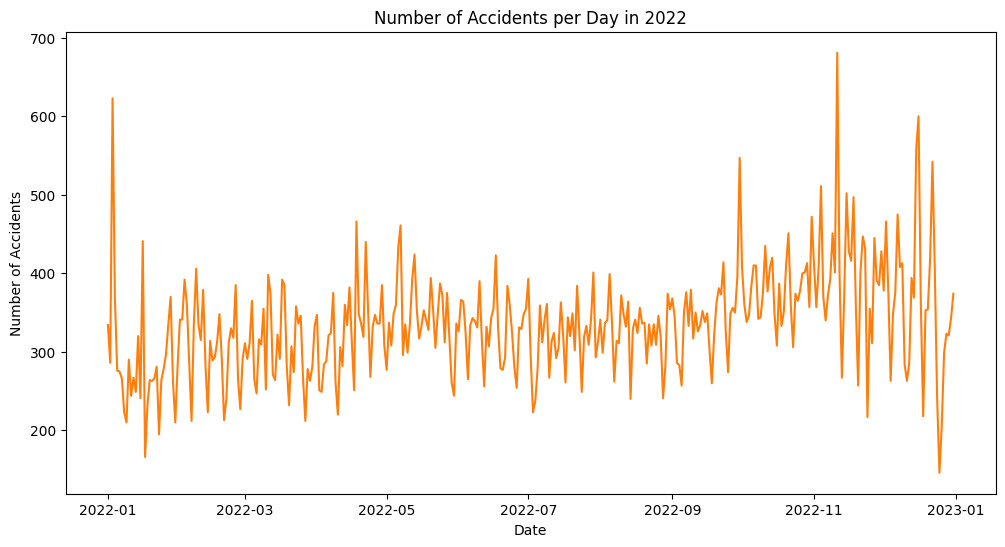

In [33]:
plot_year(2022)

In [3]:
# Prepared data by county or whole state - input to model

def get_county_df(county):
    filter_by_county = df_sorted[df_sorted['PHYSICAL_JURIS'] == county]
    daily_counts = filter_by_county.groupby('date').size()
    daily_counts_df = pd.DataFrame({'date': daily_counts.index, 'count': daily_counts.values})
    return daily_counts_df

def get_state_df():
    daily_counts = df_sorted.groupby('date').size()
    daily_counts_df = pd.DataFrame({'date': daily_counts.index, 'count': daily_counts.values})
    return daily_counts_df

In [17]:
get_state_df()

,date,count
0,2015-01-01,214
1,2015-01-02,266
2,2015-01-03,337
3,2015-01-04,256
4,2015-01-05,309
...,...,...
3098,2023-06-26,303
3099,2023-06-27,368
3100,2023-06-28,324
3101,2023-06-29,322


In [18]:
get_county_df("029. Fairfax County")

,date,count
0,2015-01-01,28
1,2015-01-02,29
2,2015-01-03,29
3,2015-01-04,27
4,2015-01-05,32
...,...,...
3098,2023-06-26,26
3099,2023-06-27,41
3100,2023-06-28,27
3101,2023-06-29,26


# Using LSTM for time series forecasting

Epoch 1/50
78/78 [==============================] - 5s 24ms/step - loss: 0.0242 - val_loss: 0.0076
Epoch 2/50
78/78 [==============================] - 1s 15ms/step - loss: 0.0096 - val_loss: 0.0074
Epoch 3/50
78/78 [==============================] - 1s 14ms/step - loss: 0.0093 - val_loss: 0.0072
Epoch 4/50
78/78 [==============================] - 1s 16ms/step - loss: 0.0092 - val_loss: 0.0073
Epoch 5/50
78/78 [==============================] - 1s 17ms/step - loss: 0.0092 - val_loss: 0.0075
Epoch 6/50
78/78 [==============================] - 1s 12ms/step - loss: 0.0092 - val_loss: 0.0073
Epoch 7/50
78/78 [==============================] - 1s 12ms/step - loss: 0.0091 - val_loss: 0.0071
Epoch 8/50
78/78 [==============================] - 1s 13ms/step - loss: 0.0092 - val_loss: 0.0071
Epoch 9/50
78/78 [==============================] - 1s 12ms/step - loss: 0.0090 - val_loss: 0.0070
Epoch 10/50
78/78 [==============================] - 1s 12ms/step - loss: 0.0089 - val_loss: 0.0071
Epoch 11/

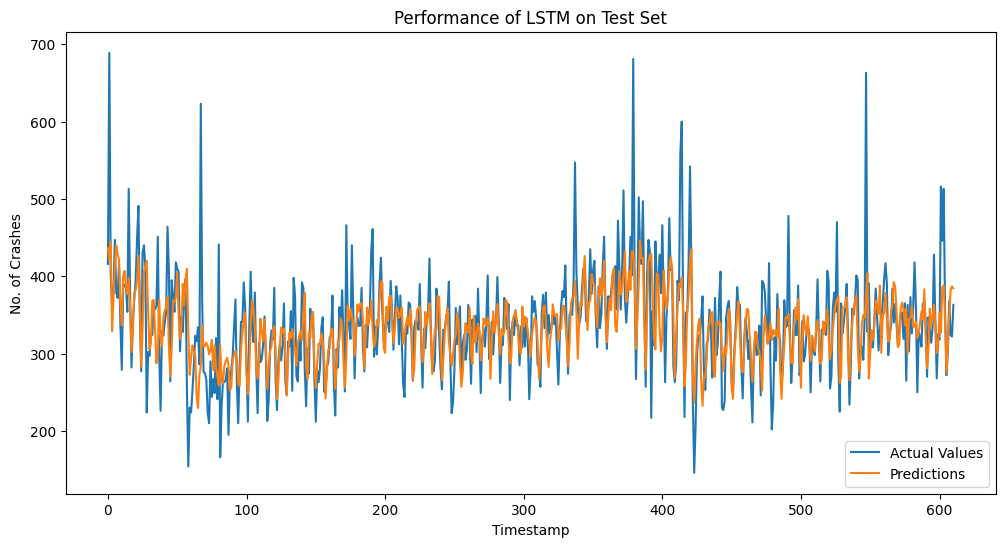

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

df=get_state_df()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
data = df['count'].values.reshape(-1, 1)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Function to create sequences for training the LSTM
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)


# Parameters of LSTM model
sequence_length = 10
LSTM_units = 50
batch_size = 32
epochs = 50

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(units=LSTM_units, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(actual_values, label='Actual Values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title("Performance of LSTM on Test Set")
plt.xlabel('Timestamp')
plt.ylabel('No. of Crashes')
plt.show()


12/12 [==============================] - 0s 4ms/step


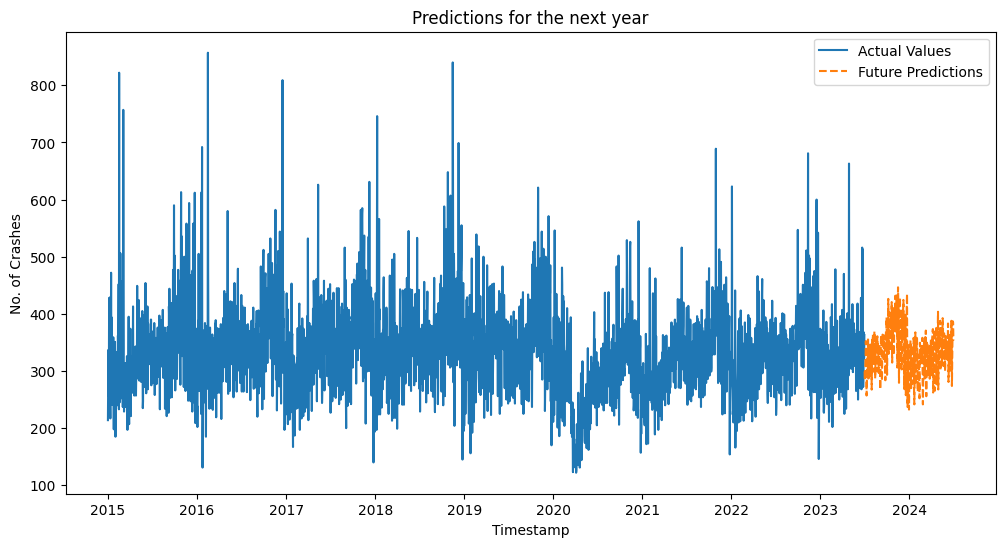

In [20]:
def create_future_sequences(data, seq_length, num_future_steps):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences[-num_future_steps:])


X_future = create_future_sequences(data_scaled, sequence_length,365) # change this to set how far into the future we want to predict
X_future = X_future.reshape(X_future.shape[0], X_future.shape[1], 1)
future_predictions = model.predict(X_future)
future_predictions = scaler.inverse_transform(future_predictions)

future_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=len(future_predictions), freq='D')
future_df = pd.DataFrame({'date': future_dates, 'predicted_count': future_predictions.flatten()})

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['count'], label='Actual Values')
plt.plot(future_df['date'], future_df['predicted_count'], label='Future Predictions', linestyle='dashed')
plt.legend()
plt.title("Predictions for the next year")
plt.xlabel('Timestamp')
plt.ylabel('No. of Crashes')
plt.show()


## Similar predictions can be made at the county level:

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

def county_level_ts_forecast(county="029. Fairfax County"):

    df=get_county_df(county)
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')
    data = df['count'].values.reshape(-1, 1)

    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    train_size = int(len(data_scaled) * 0.8)
    train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

    # Function to create sequences for training the LSTM
    def create_sequences(data, seq_length):
        sequences = []
        targets = []
        for i in range(len(data) - seq_length):
            seq = data[i:i+seq_length]
            target = data[i+seq_length]
            sequences.append(seq)
            targets.append(target)
        return np.array(sequences), np.array(targets)


    # Parameters of LSTM model
    sequence_length = 10
    LSTM_units = 50
    batch_size = 32
    epochs = 50

    X_train, y_train = create_sequences(train_data, sequence_length)
    X_test, y_test = create_sequences(test_data, sequence_length)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    model = Sequential()
    model.add(LSTM(units=LSTM_units, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')


    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    mse = model.evaluate(X_test, y_test)
    print(f'Mean Squared Error on Test Data: {mse}')

    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

    plt.figure(figsize=(12, 6))
    plt.plot(actual_values, label='Actual Values')
    plt.plot(predictions, label='Predictions')
    plt.legend()
    plt.title("Performance of LSTM on Test Set for {}".format(county))
    plt.xlabel('Timestamp')
    plt.ylabel('No. of Crashes')
    plt.show()

    def create_future_sequences(data, seq_length, num_future_steps):
        sequences = []
        for i in range(len(data) - seq_length + 1):
            seq = data[i:i+seq_length]
            sequences.append(seq)
        return np.array(sequences[-num_future_steps:])


    X_future = create_future_sequences(data_scaled, sequence_length,365) # change this to set how far into the future we want to predict
    X_future = X_future.reshape(X_future.shape[0], X_future.shape[1], 1)
    future_predictions = model.predict(X_future)
    future_predictions = scaler.inverse_transform(future_predictions)

    future_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=len(future_predictions), freq='D')
    future_df = pd.DataFrame({'date': future_dates, 'predicted_count': future_predictions.flatten()})

    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['count'], label='Actual Values')
    plt.plot(future_df['date'], future_df['predicted_count'], label='Future Predictions', linestyle='dashed')
    plt.legend()
    plt.title("Predictions for the next year for {}".format(county))
    plt.xlabel('Timestamp')
    plt.ylabel('No. of Crashes')
    plt.show()

Epoch 1/50
78/78 [==============================] - 4s 10ms/step - loss: 0.0371 - val_loss: 0.0104
Epoch 2/50
78/78 [==============================] - 0s 6ms/step - loss: 0.0157 - val_loss: 0.0105
Epoch 3/50
78/78 [==============================] - 1s 6ms/step - loss: 0.0155 - val_loss: 0.0104
Epoch 4/50
78/78 [==============================] - 0s 6ms/step - loss: 0.0154 - val_loss: 0.0104
Epoch 5/50
78/78 [==============================] - 1s 7ms/step - loss: 0.0153 - val_loss: 0.0104
Epoch 6/50
78/78 [==============================] - 1s 7ms/step - loss: 0.0154 - val_loss: 0.0104
Epoch 7/50
78/78 [==============================] - 1s 7ms/step - loss: 0.0154 - val_loss: 0.0107
Epoch 8/50
78/78 [==============================] - 1s 6ms/step - loss: 0.0150 - val_loss: 0.0107
Epoch 9/50
78/78 [==============================] - 1s 7ms/step - loss: 0.0152 - val_loss: 0.0104
Epoch 10/50
78/78 [==============================] - 0s 6ms/step - loss: 0.0150 - val_loss: 0.0108
Epoch 11/50
78/78 

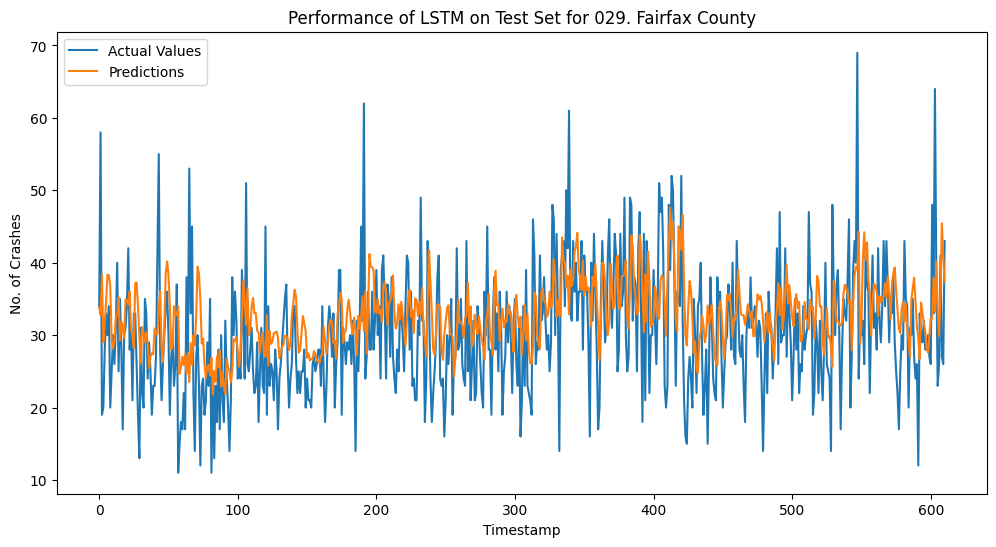

12/12 [==============================] - 0s 3ms/step


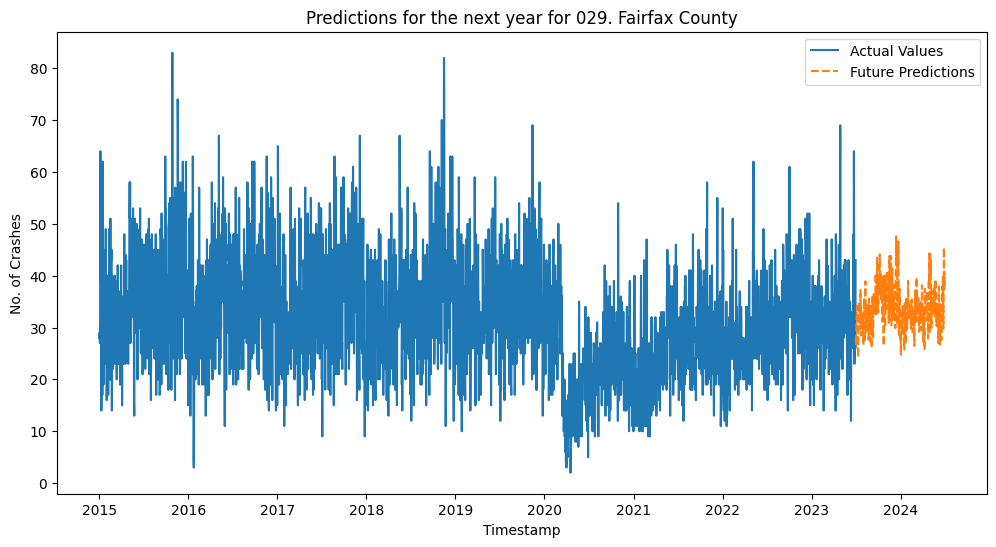

In [6]:
county_level_ts_forecast(county="029. Fairfax County")

Epoch 1/50
78/78 [==============================] - 5s 21ms/step - loss: 0.0298 - val_loss: 0.0108
Epoch 2/50
78/78 [==============================] - 1s 11ms/step - loss: 0.0148 - val_loss: 0.0105
Epoch 3/50
78/78 [==============================] - 1s 11ms/step - loss: 0.0148 - val_loss: 0.0103
Epoch 4/50
78/78 [==============================] - 1s 15ms/step - loss: 0.0147 - val_loss: 0.0100
Epoch 5/50
78/78 [==============================] - 1s 7ms/step - loss: 0.0147 - val_loss: 0.0108
Epoch 6/50
78/78 [==============================] - 1s 7ms/step - loss: 0.0147 - val_loss: 0.0100
Epoch 7/50
78/78 [==============================] - 1s 6ms/step - loss: 0.0147 - val_loss: 0.0105
Epoch 8/50
78/78 [==============================] - 1s 7ms/step - loss: 0.0147 - val_loss: 0.0099
Epoch 9/50
78/78 [==============================] - 0s 6ms/step - loss: 0.0146 - val_loss: 0.0106
Epoch 10/50
78/78 [==============================] - 1s 6ms/step - loss: 0.0145 - val_loss: 0.0112
Epoch 11/50
78/

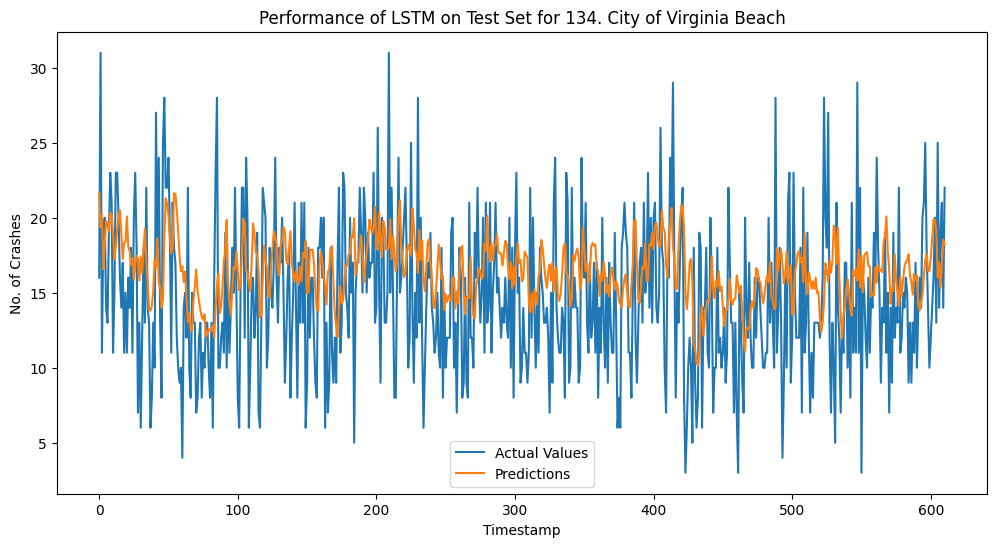

12/12 [==============================] - 0s 4ms/step


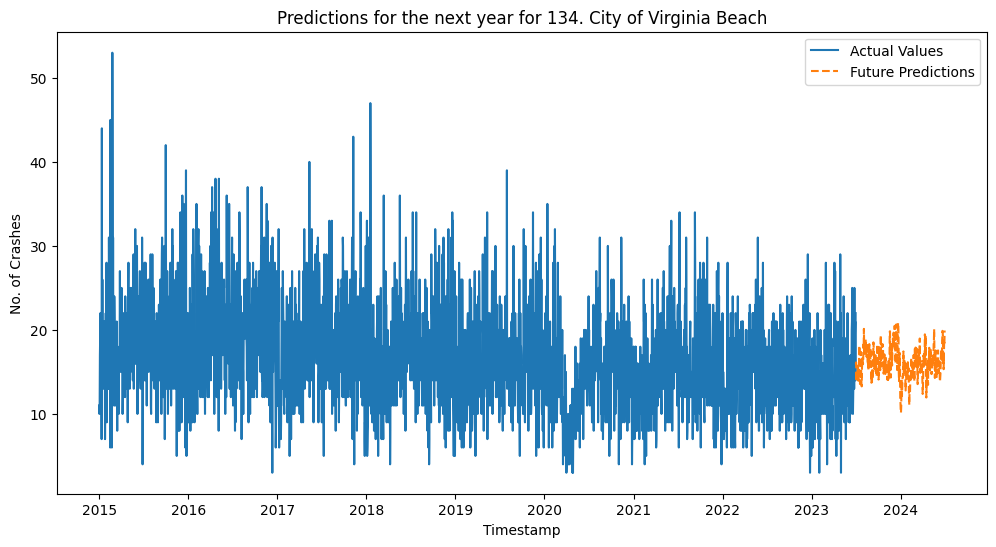

In [7]:
county_level_ts_forecast(county="134. City of Virginia Beach")

# ARIMA Model

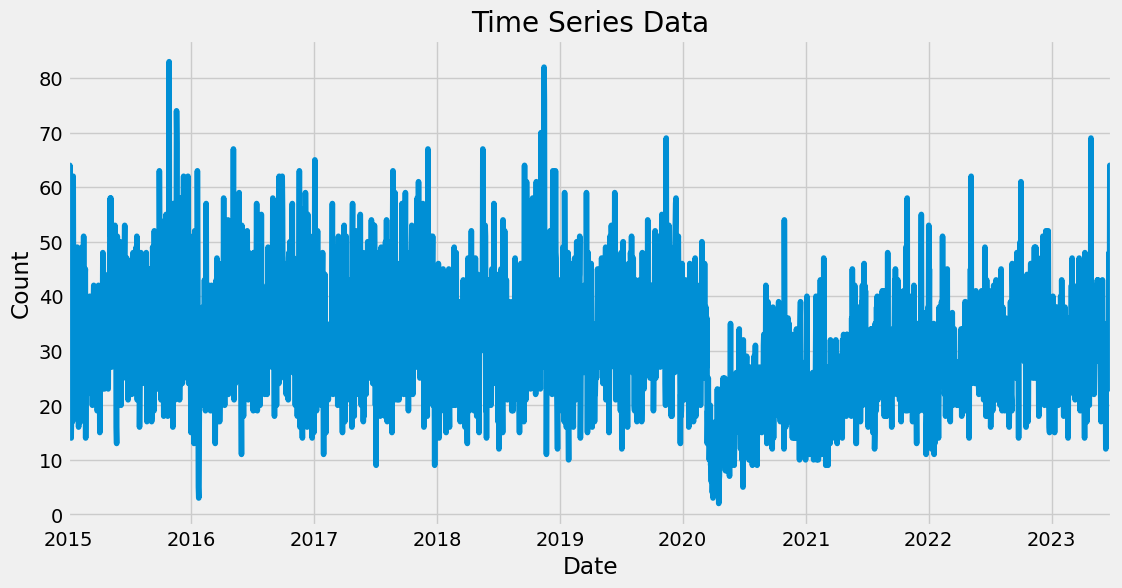

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                 3103
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11346.009
Date:                Mon, 20 Nov 2023   AIC                          22698.017
Time:                        20:42:34   BIC                          22716.136
Sample:                    01-01-2015   HQIC                         22704.524
                         - 06-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2211      0.017     12.790      0.000       0.187       0.255
ma.L1         -0.9561      0.006   -169.476      0.000      -0.967      -0.945
sigma2        87.9510      2.022     43.496      0.0

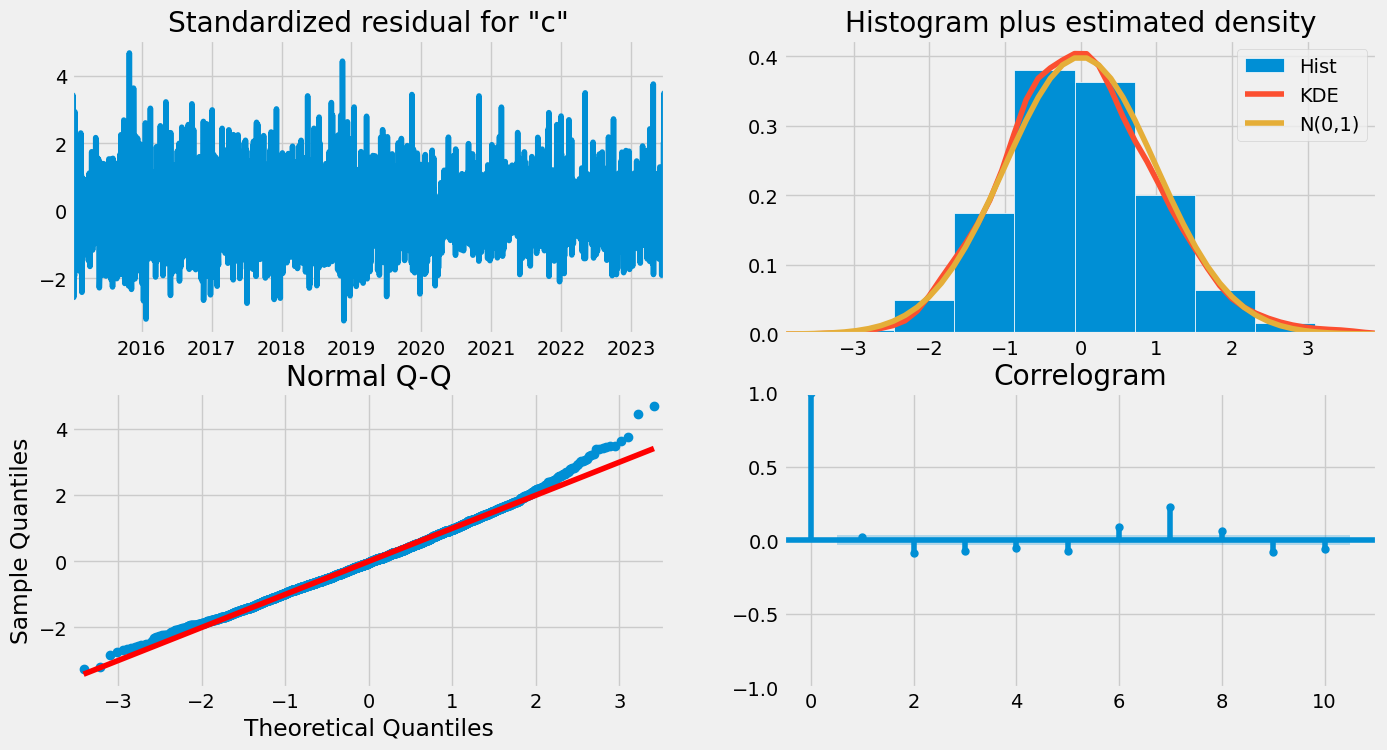

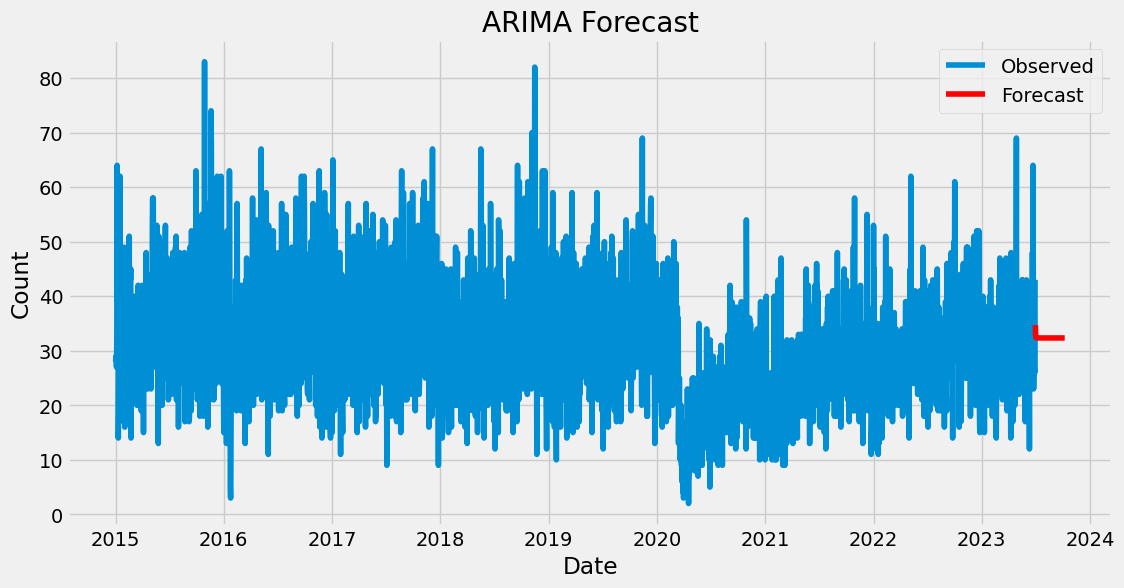

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


df = get_county_df("029. Fairfax County")
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

# Plot the time series data
df['count'].plot(figsize=(12, 6))
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

# Fit ARIMA model
order = (1, 1, 1) # (p, d, q)  Replace p, d, q with appropriate values
model = ARIMA(df['count'], order=order)
results = model.fit()

# Print the model summary
print(results.summary())

# Plot the residuals
results.plot_diagnostics(figsize=(15, 8))
plt.show()

# Forecast future values
forecast_steps = 100  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_values = forecast.predicted_mean

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['count'], label='Observed')
plt.plot(forecast_index, forecast_values, color='red', label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


References

LSTM Tutorial https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

ARIMA model: https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

# Unused Code

In [ ]:
# Google Maps API for geocoding
import requests
def get_zip(lat, lng):
    api_key = ''
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    params = {
        "latlng": f"{lat},{lng}",
        "key": api_key,
    }

    response = requests.get(base_url, params=params)
    ret_val = 0
    data = response.json()
    for info_dict in data["results"][0]["address_components"]:
        if(info_dict['types'] == ['postal_code']):
            # print(info_dict)
            ret_val = info_dict['short_name']
    # return data["results"][0]["address_components"][-1]['short_name']
    return int(ret_val)

In [ ]:
get_zip(38.031502,-78.510711)

22903